In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score
from sklearn.ensemble import RandomForestClassifier
plt.style.use('ggplot')
pd.set_option('display.max_columns', None) 

In [3]:
credit_card_data = pd.read_csv ('E:\Python\Data\creditcard.csv')

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\admin\AppData\Local\Temp\ipykernel_28596\1494169630.py:1: SyntaxWarning: invalid escape sequence '\P'
  credit_card_data = pd.read_csv ('E:\Python\Data\creditcard.csv')


**Data cleaning**

In [4]:
credit_card_data.shape

(284807, 31)

In [5]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
credit_card_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
#Distribution legit and fraud
credit_card_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

C:\Users\admin\AppData\Local\Temp\ipykernel_28596\1016539810.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=credit_card_data, palette='Set1')


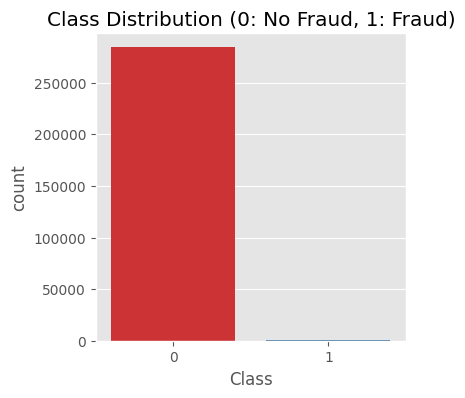

Class Distribution : Class
0    284315
1       492
Name: count, dtype: int64


In [9]:
plt.figure(figsize=(4, 4))
sns.countplot(x='Class', data=credit_card_data)
sns.countplot(x='Class', data=credit_card_data, palette='Set1')
plt.title('Class Distribution (0: No Fraud, 1: Fraud)')
plt.show()
class_count = credit_card_data['Class'].value_counts()
print (f"Class Distribution : { class_count}")

In [10]:
legit = credit_card_data [credit_card_data.Class ==0]
fraud = credit_card_data [credit_card_data.Class ==1]
print (legit.shape)
print (fraud.shape)

(284315, 31)
(492, 31)


In [11]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [12]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

#Compare value

In [13]:
credit_card_data.groupby ('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,0.009824,-0.006576,0.010832,0.000189,0.012064,0.000161,0.007164,0.011535,0.003887,-0.001178,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [14]:
#Number of fraud transactoion is 492


In [15]:
legit_sample = legit.sample(n=492)

In [16]:
#concat two dataframes
new_dataset = pd.concat([legit_sample,fraud],axis = 0)

In [17]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
122103,76437.0,-0.871784,1.903899,1.045689,2.518110,0.752728,0.563877,0.603169,0.473579,-2.126304,0.472167,-0.865273,0.209591,1.511280,0.497690,1.203186,-0.244088,0.225970,-0.740198,1.036359,0.287361,-0.331187,-0.969244,-0.113613,-0.786349,0.194511,0.035726,0.198625,0.065879,11.35,0
47993,43450.0,-0.089791,0.228842,0.186316,-1.881556,0.112207,-1.080690,0.528980,-0.108328,-1.439890,0.592751,0.700392,-0.693896,-0.886179,0.317316,-0.992055,1.215925,-0.256870,-0.793255,0.355155,0.094010,0.355224,0.963097,-0.060940,0.015034,-0.648314,-0.418502,0.416937,0.263737,15.00,0
74795,55760.0,-0.364226,0.681327,1.371193,-0.017784,0.450493,-0.692570,0.815116,-0.150319,0.173609,-0.164506,-1.085661,-0.695156,-0.971698,0.061615,0.541157,0.565560,-1.003303,-0.017526,-0.722334,0.039184,-0.302637,-0.766926,0.057187,-0.223556,-0.316850,-0.883030,0.143946,-0.090509,18.41,0
127499,78352.0,1.171824,-0.396289,-0.349015,0.597198,1.618819,4.387140,-1.039873,1.150862,1.139986,-0.310395,-1.121350,0.662765,-0.407216,-0.606299,-1.755106,-0.522057,0.002924,-0.445266,0.905006,-0.053860,-0.495702,-1.149674,0.017603,0.995408,0.652929,-0.523732,0.075818,0.025651,13.98,0
140278,83636.0,1.201303,-0.309688,-0.314367,0.167426,1.540306,4.059730,-1.136824,1.090075,0.760974,-0.142716,-0.565511,0.302266,-0.024397,-0.215351,0.367708,0.405277,-0.747008,0.384613,0.159928,-0.003537,-0.113604,-0.280918,-0.043147,1.001217,0.572592,-0.393931,0.074081,0.032089,12.99,0


In [18]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,2.115795,-5.417424,-1.235123,-6.665177,0.401701,-2.897825,-4.570529,-1.315147,0.391167,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,2.858466,-3.096915,-0.792532,-5.210141,-0.613803,-2.155297,-3.267116,-0.688505,0.737657,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,1.794969,-2.775022,-0.418950,-4.057162,-0.712616,-1.603015,-5.035326,-0.507000,0.266272,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,1.933520,-5.030465,-1.127455,-6.416628,0.141237,-2.549498,-4.614717,-1.478138,-0.035480,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,-0.888722,0.491140,0.728903,0.380428,-1.948883,-0.832498,0.519436,0.903562,1.197315,0.593509,-0.017652,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [19]:
new_dataset ['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [20]:
new_dataset.groupby ('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,90428.256098,0.047682,-0.022917,0.134138,0.099619,0.030680,0.020604,0.001712,-0.001555,-0.063673,0.027431,-0.030561,-0.029608,0.057367,-0.046788,-0.001501,0.023086,0.042706,-0.019171,-0.048484,-0.010210,0.011021,-0.003898,0.030532,0.013352,0.023751,-0.035234,-0.008176,-0.002736,83.728374
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Splitting data into feature and target

In [21]:
X= new_dataset.drop(columns= 'Class', axis =1)
Y= new_dataset['Class']

In [22]:
print (X)

            Time        V1        V2        V3        V4        V5        V6  \
122103   76437.0 -0.871784  1.903899  1.045689  2.518110  0.752728  0.563877   
47993    43450.0 -0.089791  0.228842  0.186316 -1.881556  0.112207 -1.080690   
74795    55760.0 -0.364226  0.681327  1.371193 -0.017784  0.450493 -0.692570   
127499   78352.0  1.171824 -0.396289 -0.349015  0.597198  1.618819  4.387140   
140278   83636.0  1.201303 -0.309688 -0.314367  0.167426  1.540306  4.059730   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9   

In [23]:
print (Y)

122103    0
47993     0
74795     0
127499    0
140278    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


Traning and Testing Data

In [24]:
X_train, X_test, Y_train, y_test = train_test_split (X,Y,test_size=0.2,random_state= 2)

In [25]:
print (X.shape, X_train.shape,X_test.shape)

(984, 30) (787, 30) (197, 30)


In [26]:
model = LogisticRegression()


In [27]:
#training the logisticRegression Model with trainingdata
model.fit(X_train,Y_train)

e:\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evaluation

Accuracy Score

In [28]:

#accuracy on trainingdata
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score (X_train_prediction, Y_train)

In [29]:
print ('Accuracy on training data :', training_data_accuracy)

Accuracy on training data : 0.9390088945362135


In [30]:
X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score (X_test_prediction, y_test)

In [31]:
print ('Accuracy on testing data :', testing_data_accuracy)

Accuracy on testing data : 0.9238578680203046


**Random Forest Model**

In [32]:
# Built a RF classifier
RF = RandomForestClassifier (n_estimators=100, random_state=2)
RF.fit (X_train,Y_train)
Y_pred = RF.predict (X_test)

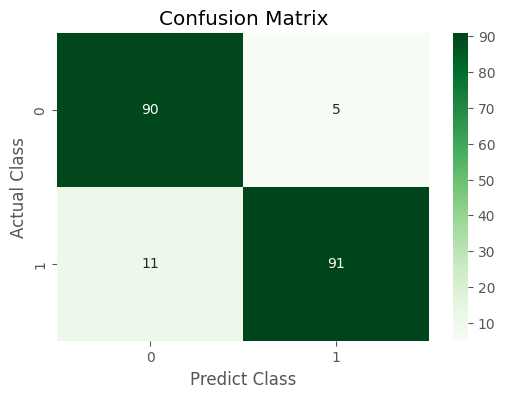

In [33]:
# Confusion Matrix
conf_matrix = confusion_matrix (y_test, Y_pred)
plt.figure (figsize = (6,4))
sns.heatmap (conf_matrix, annot = True, fmt = 'd', cmap = 'Greens')
plt.title ('Confusion Matrix')
plt.xlabel ('Predict Class')
plt.ylabel ('Actual Class')
plt.show()